# 1. Load The Tweets Dataset 

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

In [2]:
data = pd.read_csv('tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [3]:
# 0 refers to positive sentiment, 1 is negative sentiment

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [5]:
# check for missing values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
# drop the id column
# data.drop(['id'], axis=1, inplace=True)
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [7]:
# Check for the class balance
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<AxesSubplot:>

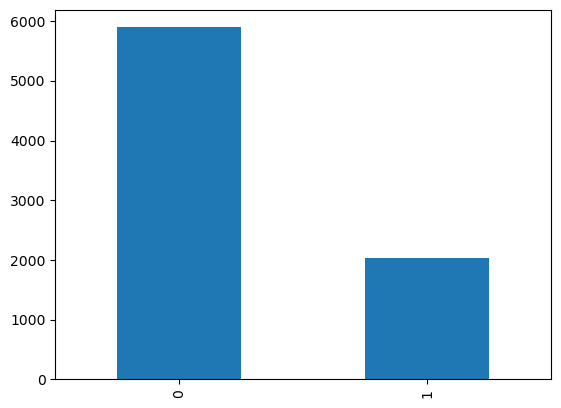

In [8]:
# plot the label counts 
data['label'].value_counts().plot(kind='bar')

# 2. Data Cleaning

In [9]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [10]:
import re

In [11]:
# Substitute 's with " is" 
re.sub(r"'s\b", " is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [12]:
# Removing the user mentions
data['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [13]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [14]:
# remive the hashtags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [15]:
re.sub("#", "", data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [16]:
# Removing the hyperlinks
re.sub(r"http\S+", "", data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [17]:
# Retain on the alphabets (get rid of punctuations, special char, digits)
data['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [18]:
re.sub(r"[^a-zA-Z]", " ", data['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [35]:
# Stop words Removal
import nltk
from nltk.corpus import stopwords

In [36]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'weren', 'out', 'itself', 'was', 'up', 'so', 'should', 'not', "doesn't", "don't", 'as', 'ain', "didn't", 'her', "you'd", 'just', 'which', 'and', "mightn't", 'can', 'didn', 'have', 'by', 'to', 'under', 'mightn', "wasn't", "that'll", 'some', "mustn't", 'of', 'from', 'yourselves', "should've", 'i', 'a', 'how', 'am', 'before', 'each', 'down', 'will', 'why', 'aren', 'be', 'on', 'shan', 'been', 'off', 'does', "you've", 'do', 'hasn', 'yours', 'ma', 'this', 'too', "haven't", 'the', "needn't", 'what', 'whom', 'is', 'couldn', "couldn't", 'once', 's', 'for', 'or', 'his', 'you', 'haven', "wouldn't", 'against', 'when', 'hers', 'mustn', 'where', 'it', "you're", 'below', 'hadn', 'ourselves', 'were', 'again', 'she', 'then', 'no', 'won', 'more', 'these', 'my', 'has', 'between', 'theirs', 'don', 'those', 'them', 'while', 'over', "aren't", 'had', "shan't", 'isn', 'shouldn', "she's", 'if', 'into', 'such', 'few', 'yourself', 'being', 'herself', "hasn't", "won't", 'wasn', 'having', 'here', "it's", 'are', '

In [37]:
len(nltk_stopwords)

179

In [38]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'even', 'whence', 'itself', 'was', 'up', 'not', 'enough', 'as', 'her', 'toward', 'formerly', 'whether', 'meanwhile', 'detail', 'side', 'have', 'eight', 'ltd', 'anyone', 'of', 'every', 'seem', 'yourselves', 'how', 'i', 'get', 'each', 'never', 'before', 'though', 'sincere', 'down', 'eg', 'why', 'mine', 'keep', 'on', 'off', 'been', 'wherein', 'either', 'seemed', 'thick', 'amongst', 'see', 'too', 'thereby', 'via', 'done', 'eleven', 'the', 'due', 'what', 'whom', 'is', 'found', 'towards', 'part', 'yet', 'once', 'might', 'everything', 'move', 'etc', 'last', 'un', 'nowhere', 'often', 'third', 'along', 'when', 'nobody', 'us', 'amount', 'below', 'hence', 'noone', 'thereupon', 'co', 'whenever', 'ourselves', 'least', 'again', 'she', 'per', 'becomes', 'sometimes', 'these', 'those', 'around', 'them', 'afterwards', 'bottom', 'beyond', 'full', 'must', 'being', 'here', 'are', 'three', 'after', 'than', 'indeed', 'him', 'somehow', 'mostly', 'we', 'at', 'both', 'they', 'may', 'elsewhere', 'top', 'about',

In [39]:
len(sklearn_stopwords)

318

In [40]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'out', 'itself', 'was', 'up', 'so', 'should', 'not', 'as', 'her', 'which', 'and', 'can', 'have', 'to', 'by', 'under', 'some', 'of', 'from', 'yourselves', 'i', 'a', 'how', 'am', 'before', 'each', 'down', 'will', 'why', 'be', 'on', 'off', 'been', 'do', 'yours', 'this', 'too', 'the', 'what', 'whom', 'is', 'once', 'for', 'or', 'his', 'you', 'against', 'when', 'hers', 'where', 'it', 'below', 'ourselves', 'were', 'again', 'then', 'she', 'no', 'more', 'these', 'my', 'has', 'between', 'those', 'them', 'while', 'over', 'had', 'if', 'into', 'such', 'few', 'yourself', 'being', 'herself', 'here', 'are', 'after', 'than', 'him', 'that', 'we', 'at', 'most', 'but', 'both', 'they', 'further', 'about', 'their', 'with', 'own', 'its', 'nor', 'only', 'during', 'through', 'our', 'above', 'an', 'themselves', 're', 'he', 'because', 'until', 'very', 'himself', 'there', 'any', 'all', 'me', 'your', 'in', 'same', 'now', 'other', 'myself', 'ours', 'who'}


In [41]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [42]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [43]:
len(combined_stopwords)

378

In [44]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [45]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [46]:
new_sent = ''
for token in data['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent    

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\khush/nltk_data'
    - 'C:\\Users\\khush\\anaconda3\\nltk_data'
    - 'C:\\Users\\khush\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\khush\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\khush\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [48]:
 !pip install contractions

     -------------------------------------- 289.9/289.9 kB 2.2 MB/s eta 0:00:00


In [49]:
import contractions
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [50]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

## Define the Cleaner Function & Apply

In [51]:
import re

In [58]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\khush\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\khush\AppData\Roaming\nltk_data...


True

In [59]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [60]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [61]:
cleaned_tweets[:5]    

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [62]:
cleaned_tweets[24]

'it is time for new wallpaper phone wallpaper wall screen galaxy samsung app '

In [63]:
data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [64]:
data['tweet'][1500].split()

['#Apple',
 'Bunch',
 'if',
 'Crooks',
 'Refused',
 'to',
 'repair/replace',
 'my',
 'beats',
 'wireless.',
 'Problem',
 'rubber',
 'on',
 'mic',
 'coming',
 'off',
 'microphones',
 'stopped',
 'working.',
 'Said',
 'warranty',
 'was',
 'void',
 'because',
 'ear',
 'piece',
 'looked',
 'chewed.',
 'Bullshit.',
 'I',
 'don’t',
 'have',
 'any',
 'animals',
 'and',
 'I',
 'would',
 'chew',
 'on',
 'anything',
 'I',
 'put',
 'in',
 'my',
 'ear.',
 'pic.twitter.com/GfgvquEpuC']

In [65]:
cleaned_tweets[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [66]:
# tweet['tweet'].apply(lambda x: tweet_cleaner(x))

In [67]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


# 3. Data Visualization

Plot the top 25 most common words in this tweets dataset

In [68]:
# Write a code to collect all the words from all the tweets into a single list
all_words = []
for t in data['tweet']:
    all_words.extend(t.split())

print(all_words[:50])
len(set(all_words)) # this is the number of unique words in the list

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]


34348

In [69]:
import matplotlib.pyplot as plt

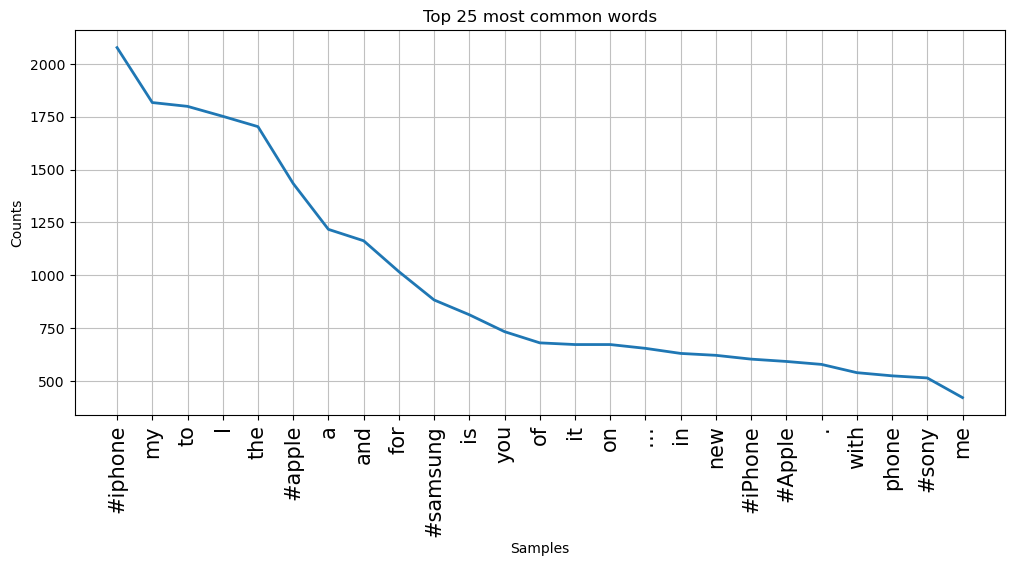

In [70]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


## Plot for Cleaned Tweets

In [71]:
# Write the code for plotting the cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


In [72]:
len(set(all_words)) # this is the number of unique words in the list

15981

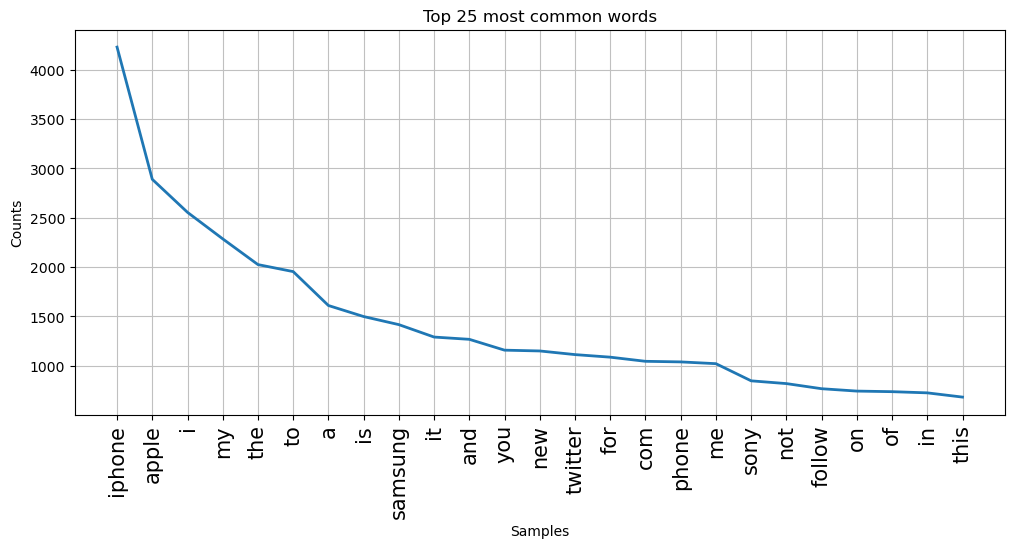

In [73]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()


## DV After applying Stop words

In [74]:
type(combined_stopwords)

set

In [75]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [76]:
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [77]:
data.columns

Index(['id', 'label', 'tweet', 'cleaned_tweets_w/o_SW'], dtype='object')

In [78]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


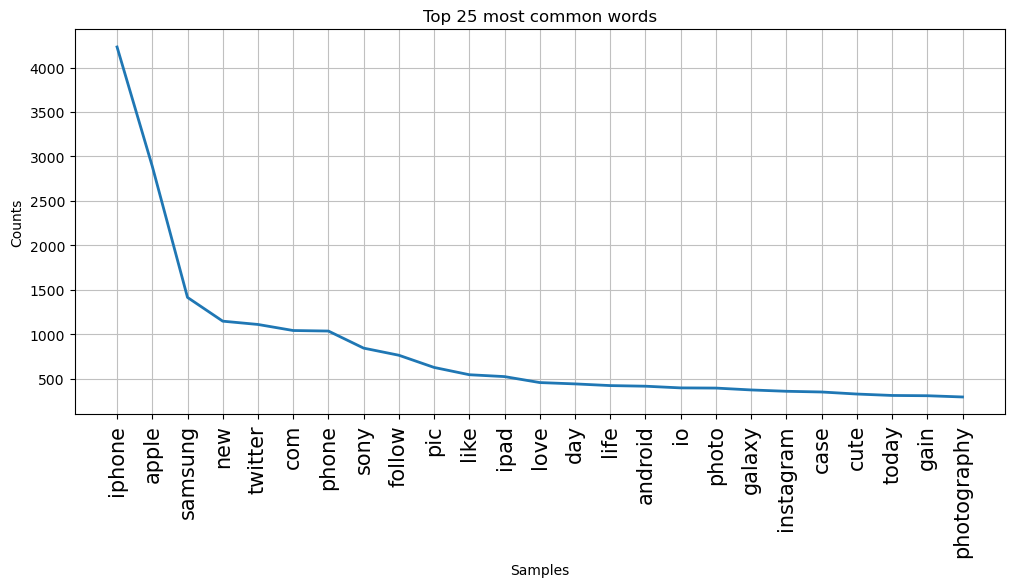

In [79]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [80]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [81]:
# HW: re-do the cleaner function to include final_stopwords
# and re-plot and see what more come up!

In [82]:
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


# 4. Bag of Words Model (Feature Extraction)

- Countvectorizer
- TF-IDF Vectorizer

In [83]:
data.shape

(7920, 5)

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_w/o_SW'])


In [85]:
CV_features.shape

(7920, 15955)

In [86]:
CV_features[0]

<1x15955 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [87]:
# df = data.copy()
# df.columns = ['label', 'cleaned_tweets_incl_SW', 'cleaned_tweets_SW_removed', 'cleaned_tweets_SW_removed_len_gt2']
# df.to_pickle('cleaned_tweets.pkl')
# df.to_csv('cleaned_tweets', index=False)

In [88]:
type(CV_features[0])  # each row is a compressed spare row 

scipy.sparse._csr.csr_matrix

In [89]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [90]:
import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df  
# Document-Term-Matrix X = [N x p ]
# N = no. of documentns
# p = no. of unique words in the vocab!!# this is your D

,0,1,2,3,4,5,6,7,8,9,...,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
df.size/1e6  # these many elements/numbers are presnt in the df

126.3636

In [92]:
import numpy as np
np.count_nonzero(df)

114973

In [93]:
100*np.count_nonzero(df)/df.size # percent of the non-zero elements i nthe df

0.09098585352110893

In [94]:
print(CV.get_feature_names()[:50])  # these the vocab words

['aa', 'aaaahhhhhhh', 'aag', 'aah', 'aalborg', 'aand', 'aapl', 'aarhus', 'aaron', 'aarp', 'aarrrggghhhh', 'aashamsakal', 'aaydojbfkq', 'aayp', 'ab', 'abah', 'abareta', 'abay', 'abb', 'abc', 'abdou', 'abe', 'aber', 'abercrombie', 'abi', 'ability', 'abit', 'able', 'ableton', 'abnqum', 'aboard', 'about', 'aboutalook', 'aboutdamntime', 'abouttime', 'abouttonight', 'above', 'abp', 'abscbn', 'absence', 'absolute', 'absolutely', 'absurd', 'abu', 'abudhabi', 'abuja', 'abujacity', 'abujafct', 'abujapeople', 'abujaphones']


C:\Users\khush\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [95]:
# CV.get_feature_names_out()[:50]  # these the vocab words

In [96]:
# len(CV.get_feature_names_out())
len(CV.get_feature_names())

15955

In [97]:
CV_features[10].todense()  # these are numbers corresponding to the 11th tweet

matrix([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [98]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the 10th tweet

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

# 5. Model building

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CV_features, data['label'], test_size=0.25, stratify=data['label'], random_state=42)

In [100]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)

print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)  

0.9779461279461279
0.8813131313131313


In [101]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)      

0.9038720538720538
0.8813131313131313


In [102]:
## leT'S Cross-Validate the Logistic Regression Model ?????
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold

In [103]:
X = CV_features
y = data['label']

In [104]:
## crOSS VALIDATE THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

[0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
88.28 0.93


In [105]:
# your's accuracy = 88.23 +/- 0.93 %

In [106]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

In [107]:
results

{'fit_time': array([0.02471685, 0.01993465, 0.01611829, 0.0158906 , 0.01655817]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.88320707, 0.86931818, 0.87752525, 0.89709596, 0.88699495]),
 'train_score': array([0.90388258, 0.90893308, 0.9040404 , 0.90372475, 0.90435606])}

In [108]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

[0.90388258 0.90893308 0.9040404  0.90372475 0.90435606]
90.5 0.2


In [109]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

[0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
88.28 0.93


## Hyper parameter tuning of the LR1 model

In [110]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [111]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [112]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.95001}, 0.8906565656565656, 19)

In [113]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [114]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.06565656565655

In [115]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

# means your "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!

93.28282828282829

In [116]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.6480114858765835

In [117]:
grid_results.cv_results_['mean_test_score']

array([0.74419192, 0.84494949, 0.86338384, 0.87171717, 0.87537879,
       0.8790404 , 0.88017677, 0.88156566, 0.88282828, 0.88497475,
       0.88560606, 0.88661616, 0.88699495, 0.88876263, 0.88926768,
       0.88876263, 0.8895202 , 0.8895202 , 0.88989899, 0.89065657])

In [118]:
grid_results.cv_results_['mean_train_score']

array([0.74419192, 0.85      , 0.86998106, 0.8803346 , 0.88718434,
       0.89232955, 0.89649621, 0.90094697, 0.90498737, 0.90811237,
       0.91003788, 0.91344697, 0.91568813, 0.91856061, 0.92133838,
       0.92332702, 0.92604167, 0.92856692, 0.93055556, 0.93282828])

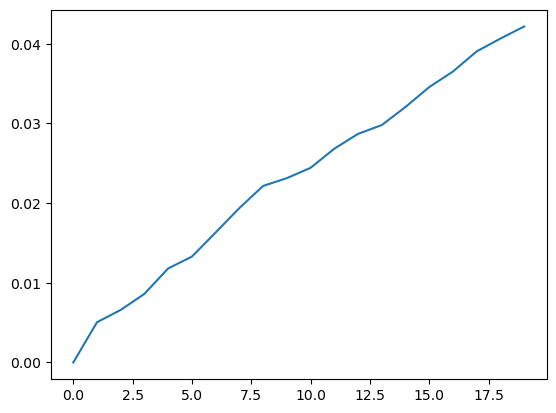

In [119]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [120]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [121]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [122]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([-1.11022302e-16,  5.05050505e-03,  6.59722222e-03,  8.61742424e-03,
        1.18055556e-02,  1.32891414e-02,  1.63194444e-02,  1.93813131e-02,
        2.21590909e-02,  2.31376263e-02,  2.44318182e-02,  2.68308081e-02,
        2.86931818e-02,  2.97979798e-02,  3.20707071e-02,  3.45643939e-02,
        3.65214646e-02,  3.90467172e-02,  4.06565657e-02,  4.21717172e-02])

In [123]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

88.28 0.93


In [124]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [125]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [126]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

15955

In [127]:
# print(CV_pipe['CV'].vocabulary_)

# 6. LR Model without vs with stop_words ??

In [128]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

86.87 1.07


15673

In [129]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

86.77 1.03


1086

In [130]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

85.24 1.3


300

# 7. TF-IDF Vector BoW Model + Logistic Regression

In [131]:
doc1 = 'I love cooking'
doc2 = 'Today I cooked pasta today'

In [132]:
# TF_score = how many times a word (from the vocab) is appearing in a given doc / total no. of words in that doc
# TF(today | doc2) = 2/5
# TF_score will be high for "very frequent" words in a given doc

# IDF_score = log( (1+Total no. of documents) / (1+No. of documents contianing that "term") )
# IDF_score penalizes those those words which are EQUALLY frequent in almost all the documents

# TF_IDF score = TF_score*IDF_score

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

86.82 0.14
85.24 0.84


1000

# 8. Dimesionality Reduction

In [134]:
# [7920 x 15955] >>> [7920 x 1000]

In [135]:
from sklearn.decomposition import TruncatedSVD

X = data['cleaned_tweets_w/o_SW']
y = data['label']

TFIDF = TfidfVectorizer()  # will originally have 15955 features
SVD = TruncatedSVD(n_components=1000)  # reduce it to 1000 PCs

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF), ('SVD', SVD), ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  

87.42 0.25
86.57 0.83


15955

In [136]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(),
 'SVD': TruncatedSVD(n_components=1000),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

# 9. N-Gram Models

In [137]:
# Unigrams + Bigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.89 0.21
86.84 0.68


3322

In [138]:
# CV.vocabulary_

In [139]:
CV_pipe.named_steps

{'CV': CountVectorizer(min_df=5, ngram_range=(1, 2),
                 stop_words=['phone', 'mobile', 'twitter', 'rt', 'com', 'follow',
                             'even', 'whence', 'itself', 'was', 'up', 'not',
                             "doesn't", 'as', 'enough', 'ain', 'her', 'toward',
                             "you'd", 'just', 'formerly', 'whether', 'meanwhile',
                             'detail', 'side', 'have', 'eight', 'ltd', 'anyone',
                             "that'll", ...]),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [140]:
import joblib
joblib.__version__

'1.1.0'

In [143]:
pip install --upgrade joblib==1.1.0

Note: you may need to restart the kernel to use updated packages.


In [144]:
 !pip install mglearn
import mglearn

     ------------------------------------- 540.1/540.1 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582621 sha256=a616d51125979ba1a3439bba6a05a69600ed0a8b82e3d4c61fd96ffc6b535d9d
  Stored in directory: c:\users\khush\appdata\local\pip\cache\wheels\df\30\8a\1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn


C:\Users\khush\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


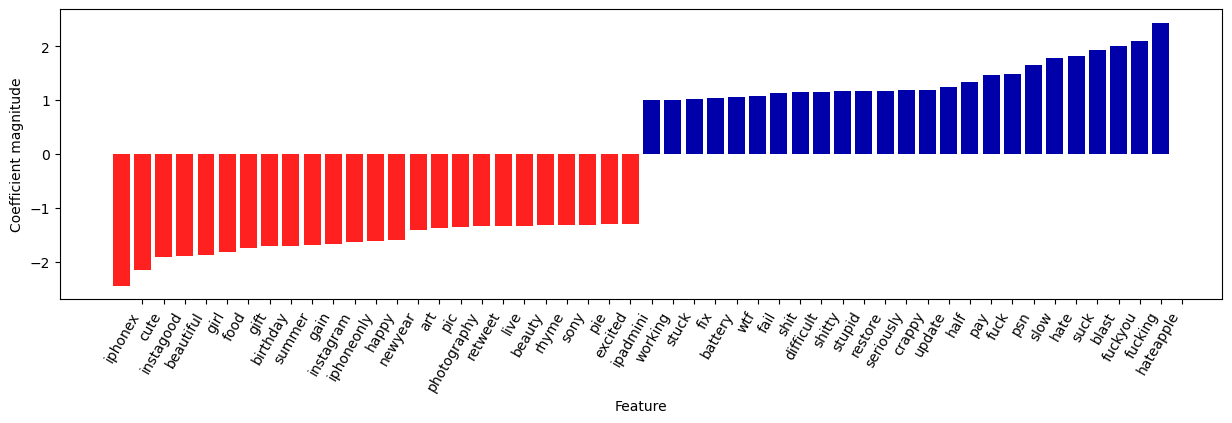

In [145]:
# Most important features when using unigrams, bigrams, and trigrams with tf-idf rescaling

# extract feature names and coefficients for Unigram Model
# CV = CV_pipe.named_steps['CV']
feature_names = np.array(CV.get_feature_names())
# LR = CV_pipe.named_steps['LR']


LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=25)

In [146]:
len(coef.ravel()), len(feature_names) 

(3322, 3322)

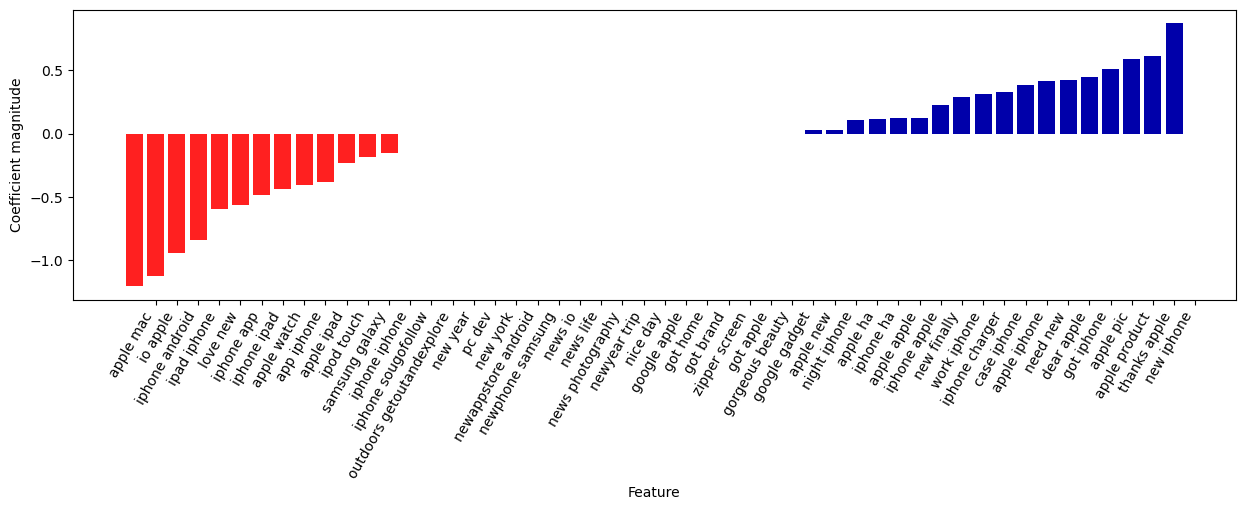

In [147]:
# Visualizing only the trigrams
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 2-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)

In [148]:
# Unigrams + Bigrams + Trigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.88 0.2
86.84 0.68


3871

In [153]:
# Visualizing only the trigrams
# find 3-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
feature_names = np.array(CV.get_feature_names())

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_



C:\Users\khush\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [154]:
len(coef.ravel()), len(feature_names)

(3871, 3871)

In [155]:
# CV.vocabulary_

In [156]:
data.to_pickle("tweets_cleaned.pkl")